In [2]:
import pandas as pd

df = pd.read_csv("../data/data_full/mushroom/agaricus-lepiota.data", header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [25]:
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

df = pd.read_csv("../data/data_full/mushroom/agaricus-lepiota.data", names=columns)

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [26]:
print(df.shape)

(8124, 23)


In [27]:
print(df.dtypes)

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [28]:
print(df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [29]:
import matplotlib.pyplot as plt
 
categorical_columns = df.columns.drop('class')
print(df[categorical_columns].describe())

       cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count       8124        8124      8124    8124  8124            8124   
unique         6           4        10       2     9               2   
top            x           y         n       f     n               f   
freq        3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color stalk-shape  ...  \
count          8124      8124       8124        8124  ...   
unique            2         2         12           2  ...   
top               c         b          b           t  ...   
freq           6812      5612       1728        4608  ...   

       stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
count                      8124                   8124                   8124   
unique                        4                      9                      9   
top                           s                      w                      w   
freq     

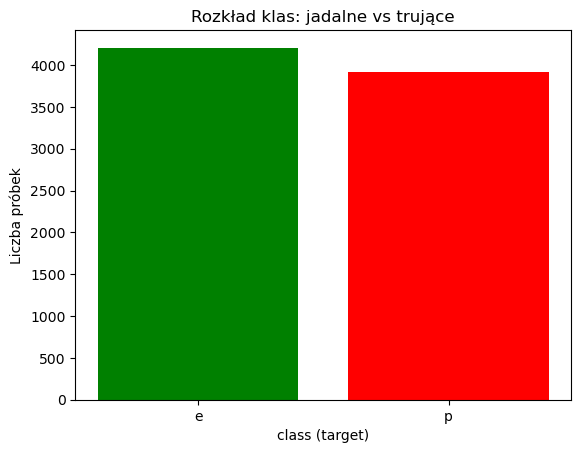

class
e    0.517971
p    0.482029
Name: count, dtype: float64


In [30]:
counts = df['class'].value_counts()
plt.bar(counts.index, counts.values, color=['green','red'])
plt.title("Rozkład klas: jadalne vs trujące")
plt.xlabel("class (target)")
plt.ylabel("Liczba próbek")
plt.show()

print(counts / counts.sum())


# W zbiorze mushrooms naszym targetem jest kolumna class która określa, czy dany grzyb jest:
#    e - jadalny
#    p - niejadalny

In [31]:
print("Braki w kolumnach:\n", df.isnull().sum())

Braki w kolumnach:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


# W tym zbiorze nie ma brakujących wartości.

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
df_en = df.copy()
le = LabelEncoder()
for col in df_en.columns:
    df_en[col] = le.fit_transform(df_en[col])
 
print(df_en.head())

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

# Enkodowanie pozwala zamienić kolumny tekstowe na liczby i przygotować dane dla modelu klasyfikacji.

In [35]:
print(df['cap-color'].value_counts(normalize=True))

cap-color
n    0.281142
g    0.226489
e    0.184638
y    0.131955
w    0.128016
b    0.020679
p    0.017725
c    0.005416
u    0.001969
r    0.001969
Name: proportion, dtype: float64


# c, u oraz r to najrzadziej występujace wartości w kolumnie "color"

In [18]:
print(df.nunique())

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


# W kolumnach występuje mało unikalnych wartości. W zbiorze mushrooms nie ma wartości liczbowych więc wartości odstające nie istnieją, dodatkowo każdy rekord ma zanczenie dla klasyfikacji jadalny/trujący ma znaczenie.

###Metryka: F1-score
###Uzasadnienie:
##W problemie klasyfikacji grzybów kluczowe jest, żeby uniknąć fałszywego zaklasyfikowania trującego grzyba jako jadalnego.  
##Dlatego ta metryka jest lepszym wyborem, ponieważ uwzględnia oba typy błędów (fałszywie pozytywne oraz fałszywie negatywne).

**Metryka:** F1-score.
**Uzasadnienie:** W problemie klasyfikacji grzybów ważne jest, żeby uniknąć fałszywego zaklasyfikowania trującego grzyba jako jadalnego. Dlatego ta metryka jest lepszym wyborem niż np. Accuracy, ponieważ uwzględnia oba typy błędów (false-positive oraz false-negative).